Zadanie 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px


In [2]:
def readFromFile(filename):
    file = open(filename)
    result = []
    for _ in file:
        line = file.readline()
        cols = line.split()
        result.append(cols)
    file.close()
    return result



Plik 1 - ekg1.txt

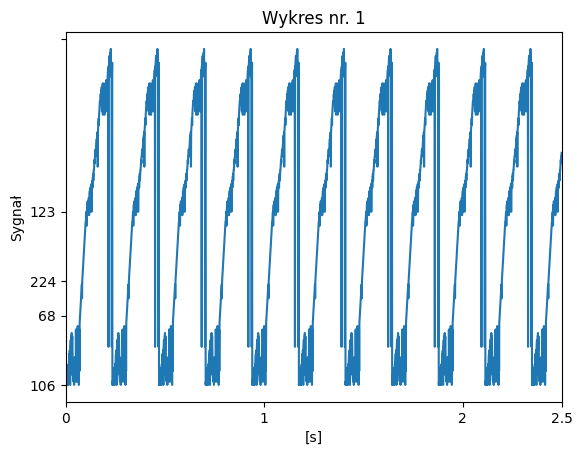

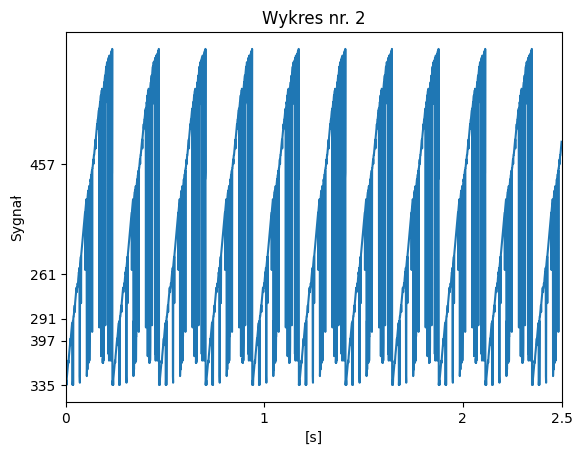

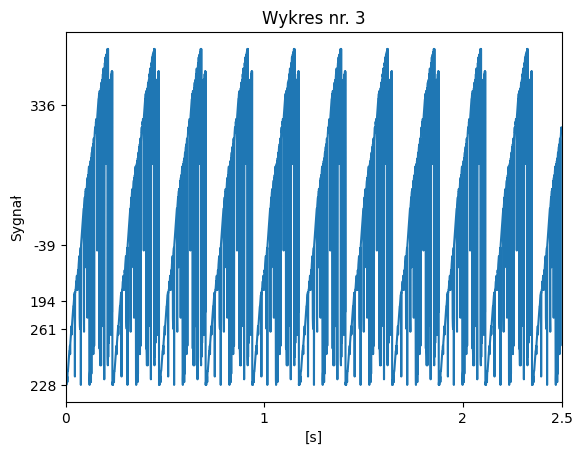

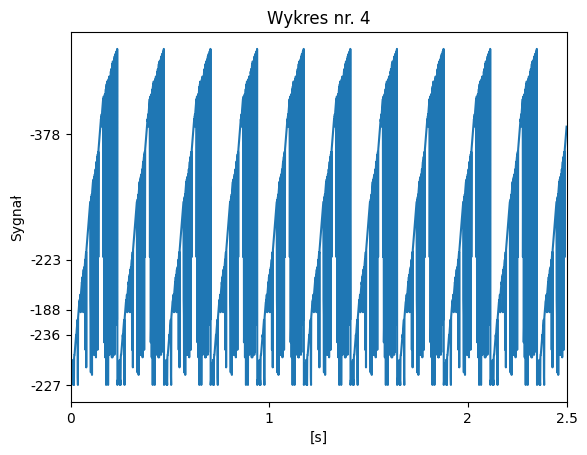

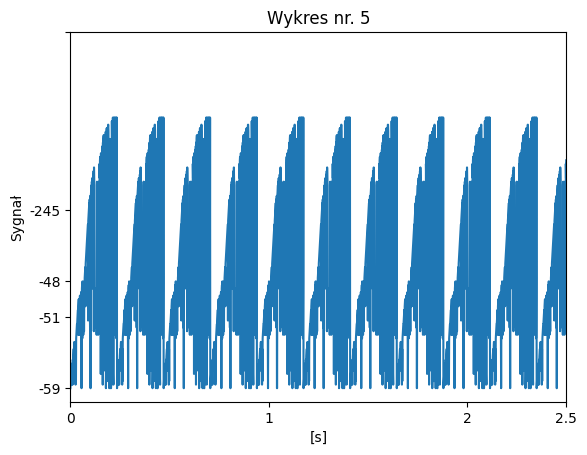

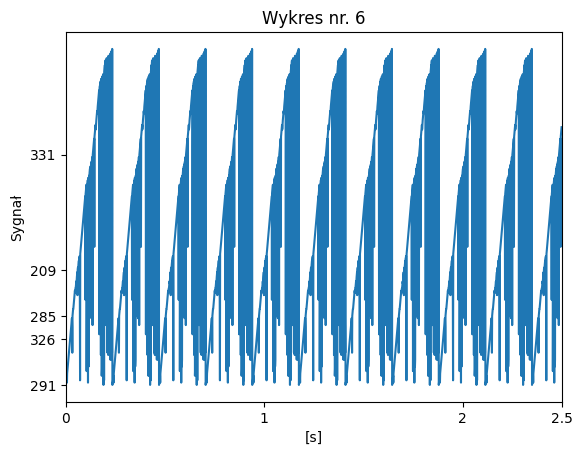

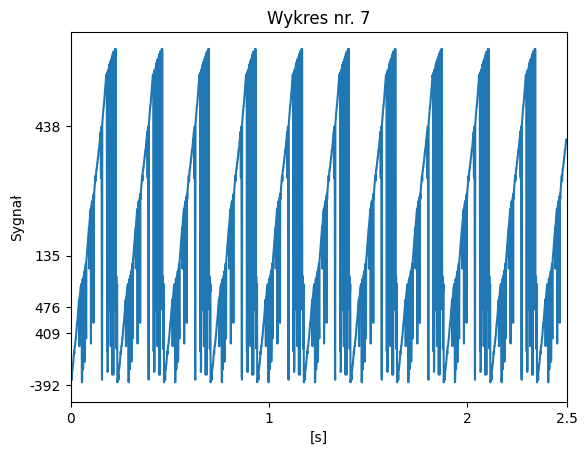

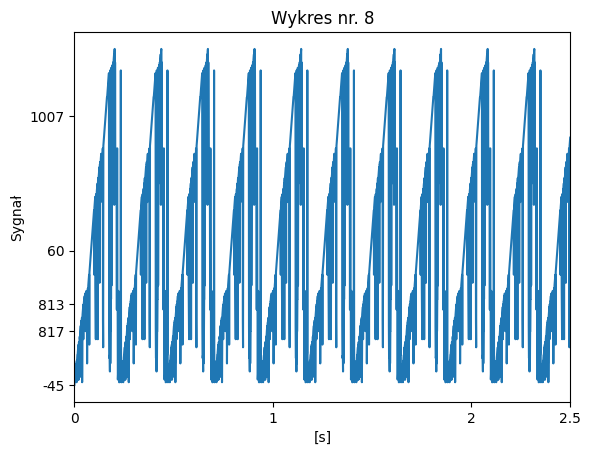

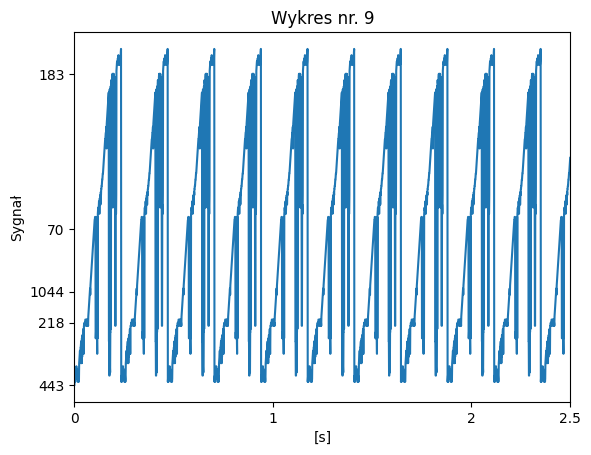

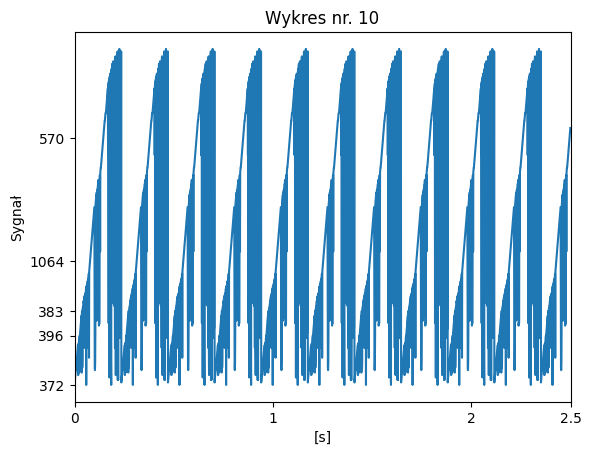

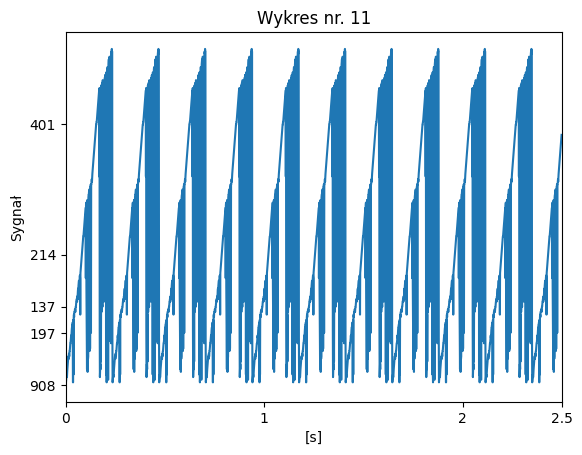

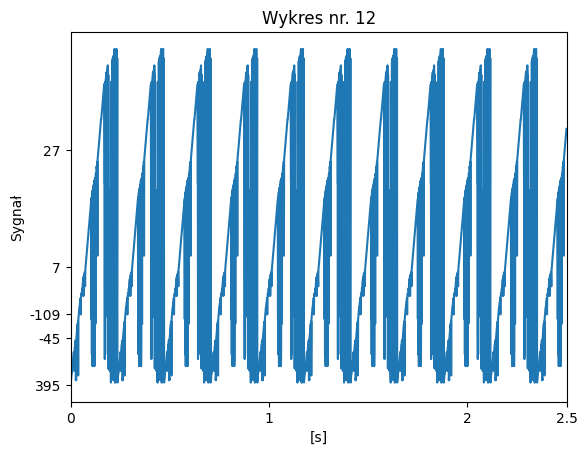

In [3]:
result = readFromFile("ekg1.txt")
trans = np.array(result).T.tolist()

for j in range(len(result[0])):
    range1 = range(0, len(trans[j]))
    plt.plot(range1, trans[j])
    # odpowiednia ilosc okresow
    plt.xlim(0, 20)
    plt.yticks([0, 20, 30, 50, 100])
    plt.xticks([0, 1000, 2000, 2500], [0, 1, 2, 2.5])
    plt.xlabel("[s]")
    plt.ylabel("Sygnał")
    plt.title(f"Wykres nr. {j+1}")
    plt.show()



Plik 2 - ekg_noise.txt

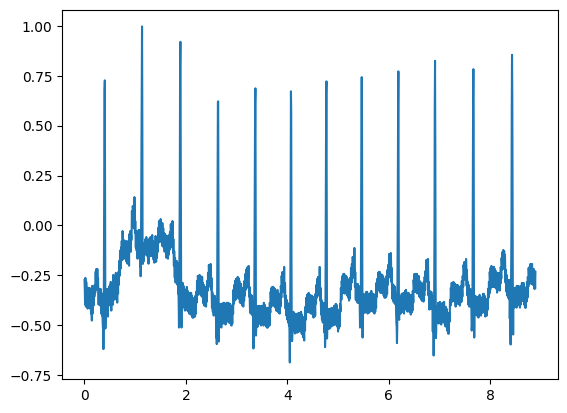

In [4]:
result2 = readFromFile("ekg_noise.txt")
res1 = []
res2 = []
for i in range(len(result2) - 1):
    res1.append(float(result2[i][0]))
    res2.append(float(result2[i][1]))
plt.plot(res1, res2)
#plt.xlim(0, 100)
# plt.yticks([0, 20, 30, 50, 100])
#plt.xticks([0, 100, 200, 300, 400])
plt.show()



Plik 3- ekg100.txt

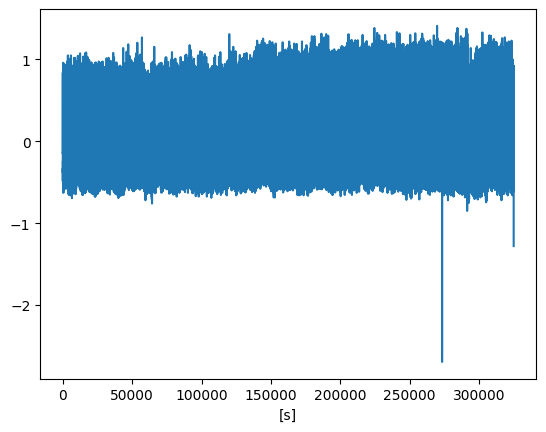

In [5]:
result3 = readFromFile("ekg100.txt")
res3 = []
for i in range(len(result3)):
    res3.append(float(result3[i][0]))
plt.plot(res3)
#plt.xlim(0, 100)
# plt.yticks([0,20, 30, 50, 100])
#plt.xticks([0, 10000, 20000, 30000, 40000], [0, 100, 200, 300, 400])
plt.xlabel("[s]")
plt.show()

Zadanie 2

2.1-2.2

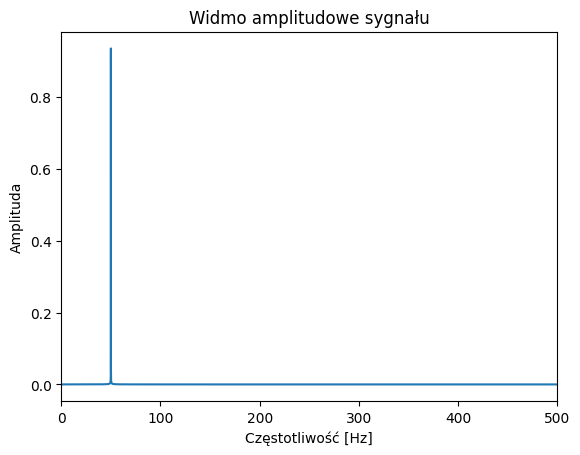

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry sygnału
f = 50  # częstotliwość w Hz
fs = 1000  # częstotliwość próbkowania w Hz
n = 65536  # długość sygnału w próbkach

# Generowanie czasu trwania sygnału
t = np.arange(n) / fs

# Generowanie sygnału sinusoidalnego
x = np.sin(2 * np.pi * f * t)

# Wyznaczanie widma amplitudowego
X = np.fft.fft(x)
freq = np.fft.fftfreq(n, 1/fs)
amp = np.abs(X[:n//2]) / n * 2

# Wizualizacja widma amplitudowego
plt.plot(freq[:n//2], amp)
plt.xlim([0, fs/2])
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.title('Widmo amplitudowe sygnału')
plt.show()

# sygnal ma czestotliwosc 50Hz



2.3

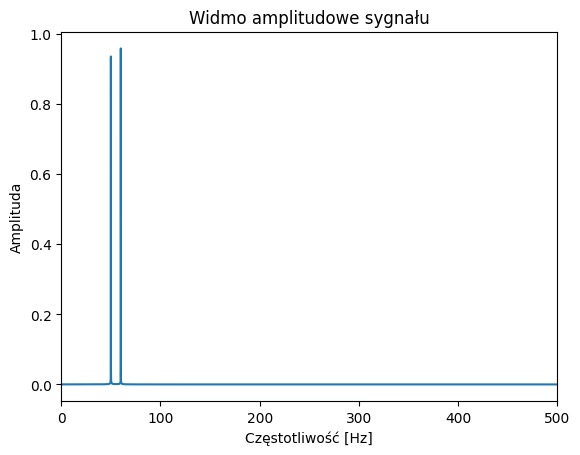

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry sygnału
f1 = 50  # częstotliwość 1. składowej w Hz
f2 = 60  # częstotliwość 2. składowej w Hz
fs = 1000  # częstotliwość próbkowania w Hz
n = 65536  # długość sygnału w próbkach

# Generowanie czasu trwania sygnału
t = np.arange(n) / fs

# Generowanie mieszaniny dwóch fal sinusoidalnych
x = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# Wyznaczanie widma amplitudowego
X = np.fft.fft(x)
freq = np.fft.fftfreq(n, 1/fs)
amp = np.abs(X[:n//2]) / n * 2

# Wizualizacja widma amplitudowego
plt.plot(freq[:n//2], amp)
plt.xlim([0, fs/2])
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.title('Widmo amplitudowe sygnału')
plt.show()

# 50,60 - dwie skladowe czestotliwosci


2.4 

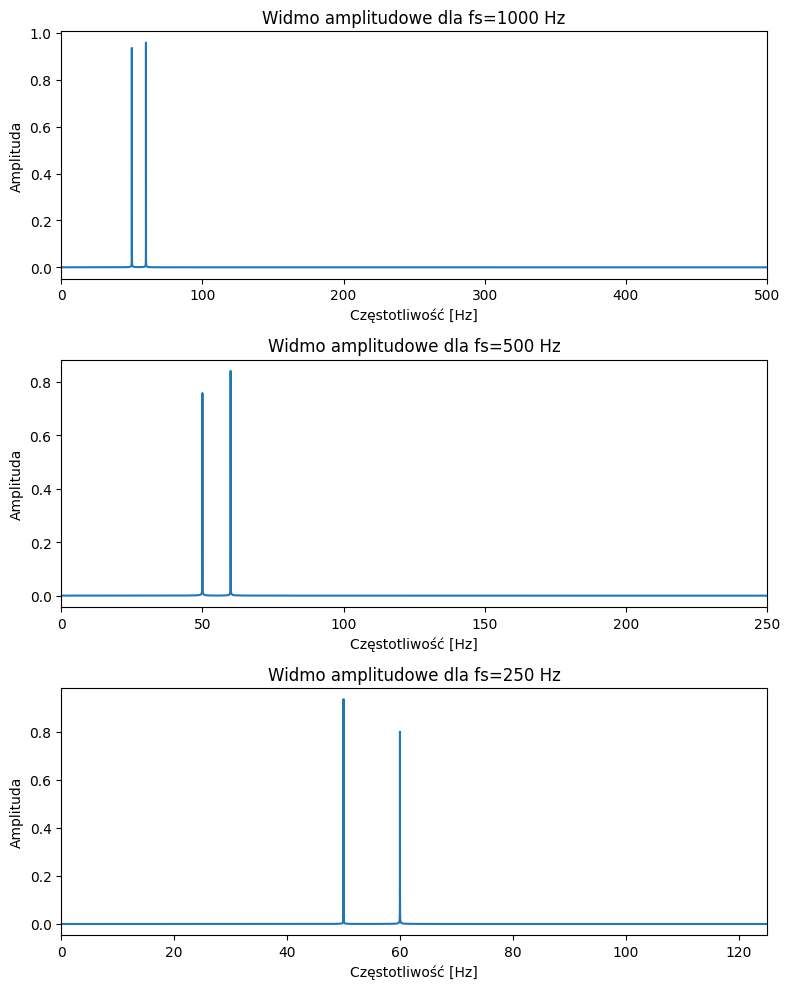

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry sygnału
f1 = 50  # częstotliwość 1. składowej w Hz
f2 = 60  # częstotliwość 2. składowej w Hz
n = 65536  # długość sygnału w próbkach

# Generowanie czasu trwania sygnału
t = np.arange(n) / fs

# Wykresy
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# enumerate po roznych czestotliwosciach probkowania
for i, fs in enumerate([1000, 500, 250]):
    # Generowanie mieszaniny dwóch fal sinusoidalnych
    t = np.arange(n) / fs
    x = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

    # Wyznaczanie widma amplitudowego
    X = np.fft.fft(x)
    freq = np.fft.fftfreq(n, 1/fs)
    amp = np.abs(X[:n//2]) / n * 2

    # Wizualizacja widma amplitudowego
    axs[i].plot(freq[:n//2], amp)
    axs[i].set_xlim([0, fs/2])
    axs[i].set_xlabel('Częstotliwość [Hz]')
    axs[i].set_ylabel('Amplituda')
    axs[i].set_title(f'Widmo amplitudowe dla fs={fs} Hz')

plt.tight_layout()
plt.show()


2.5

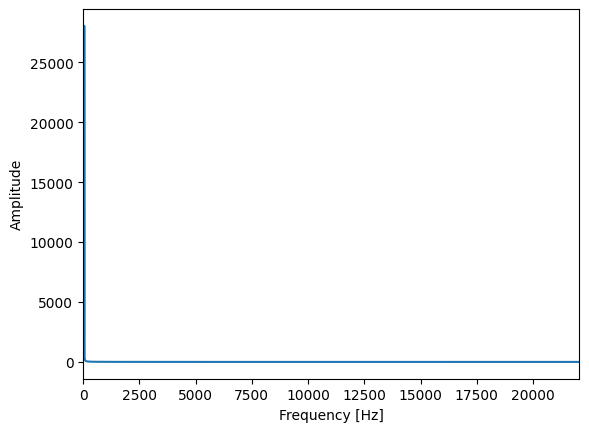

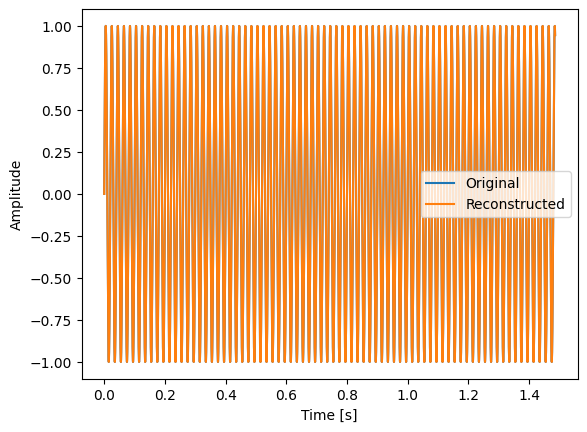

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the signal
fs = 44100
f = 50
length = 65536

t = np.arange(length) / fs
x = np.sin(2*np.pi*f*t)

# Compute the Fourier transform
X = np.fft.fft(x)
freqs = np.fft.fftfreq(length, 1/fs)
amplitudes = np.abs(X)

# Plot the spectrum
plt.plot(freqs[:length//2], amplitudes[:length//2])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.xlim(0, fs/2)
plt.show()

# Compute the inverse Fourier transform
x_reconstructed = np.fft.ifft(X)

# Plot the original and reconstructed signals
plt.plot(t, x, label='Original')
plt.plot(t, x_reconstructed.real, label='Reconstructed')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()



Zadanie 3

3.1 

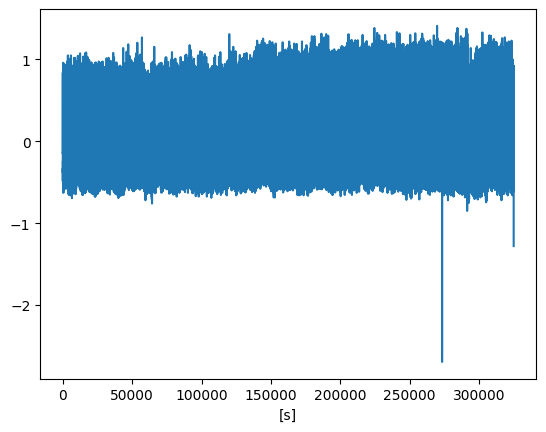

In [10]:
result3 = readFromFile("ekg100.txt")
res3 = []
for i in range(len(result3)):
    res3.append(float(result3[i][0]))
plt.plot(res3)
#plt.xlim(0, 100)
#plt.yticks([0,20, 30, 50, 100])
#plt.xticks([0, 10000, 20000, 30000, 40000], [0, 100, 200, 300, 400])
plt.xlabel("[s]")
plt.show()